In [2]:
!pip install kaggle

     |████████████████████████████████| 58 kB 2.3 MB/s eta 0:00:011
     |████████████████████████████████| 60 kB 4.3 MB/s eta 0:00:011
     |████████████████████████████████| 118 kB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 9.2 MB/s  eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72858 sha256=d491e425de9019a3221dad5d06ce4e0d8a8ce3d80c795880a65b9701c25bf8fe
  Stored in directory: /home/patelhrahul38/.cache/pip/wheels/82/70/eb/c24fd9ca49f303cb3b415b18849f557b2d38c391aa9d2b2183
  Created wheel for python-slugify: filename=python_slugify-4.0.0-py2.py3-none-any.whl size=5486 sha256=82f449686e934905b7b8ecd58560dc9415bf39719d8be7eb093207c5e33e2420
  Stored in directory: /home/patelhrahul38/.cache/pip/wheels/a5/b8/e6/d4f37f7eae8c6c2684436fdaa6d4a772628b652d127e1c01be
Successfully built kaggle python-slugify
ERROR: tensorboard 2.1.1 has requirement setuptools>=41.0.0, but you'll have setuptools 33.1.1 which is incompatible.
  Attem

In [56]:
#reading the Csv file
import pandas as pd
df = pd.read_csv('HAM10000_metadata.csv')

In [57]:
#displaying a summary of the data
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [58]:
#finding Null Values
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [59]:
#replacing null values with average value of age column
df.age.fillna(df.age.mean(),inplace=True)

In [65]:
#describing the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
lesion_id       10015 non-null object
image_id        10015 non-null object
dx              10015 non-null object
dx_type         10015 non-null object
age             10015 non-null float64
sex             10015 non-null object
localization    10015 non-null object
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [60]:
#checking if null values are removed
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [50]:
#Grouping the lesion type and showing the count of each type
df.groupby("lesion_id").count().head()

,image_id,dx,dx_type,age,sex,localization
lesion_id,,,,,,
HAM_0000000,2,2,2,2,2,2
HAM_0000001,1,1,1,1,1,1
HAM_0000002,3,3,3,3,3,3
HAM_0000003,1,1,1,1,1,1
HAM_0000004,1,1,1,1,1,1


In [46]:
#showing the count of each body part where cancer was detected
df.groupby("localization").count()['lesion_id'].sort_values()

localization
acral                 7
genital              48
ear                  56
hand                 90
scalp               128
neck                168
unknown             234
foot                319
chest               407
face                745
abdomen            1022
upper extremity    1118
trunk              1404
lower extremity    2077
back               2192
Name: lesion_id, dtype: int64

##### Plotting of Technical Validation field (ground truth) which is dx_type to see the distribution of its 4 categories which are listed below :
1. Histopathology(Histo): Histopathologic diagnoses of excised lesions have been performed by specialized dermatopathologists.
2. Confocal: Reflectance confocal microscopy is an in-vivo imaging technique with a resolution at near-cellular level , and some facial benign with a grey-world assumption of all training-set images in Lab-color space before and after manual histogram changes.
3. Follow-up: If nevi monitored by digital dermatoscopy did not show any changes during 3 follow-up visits or 1.5 years biologists accepted this as evidence of biologic benignity. Only nevi, but no other benign diagnoses were labeled with this type of ground-truth because dermatologists usually do not monitor dermatofibromas, seborrheic keratoses, or vascular lesions.
4. Consensus: For typical benign cases without histopathology or followup biologists provide an expert-consensus rating of authors PT and HK. They applied the consensus label only if both authors independently gave the same unequivocal benign diagnosis. Lesions with this type of groundtruth were usually photographed for educational reasons and did not need further follow-up or biopsy for confirmation.

In [47]:
df.groupby("dx_type").count()['lesion_id'].sort_values()

dx_type
confocal       69
consensus     902
follow_up    3704
histo        5340
Name: lesion_id, dtype: int64

In [66]:
#finding the count of male/female patients
df.groupby("sex").count()['lesion_id'].sort_values()

sex
unknown      57
female     4552
male       5406
Name: lesion_id, dtype: int64

In [67]:
#Count of each cancer type
df.groupby("dx").count()['lesion_id'].sort_values()

dx
df        115
vasc      142
akiec     327
bcc       514
bkl      1099
mel      1113
nv       6705
Name: lesion_id, dtype: int64

In [68]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [91]:
#creating new columns based on cancer and cancer type
df['Cancer_type'] = df['dx'].map(lesion_type_dict.get) 
df['Cancer_id'] = pd.Categorical(df['Cancer_type']).codes

In [92]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,Cancer_type,Cancer_id
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face,Benign keratosis-like lesions,2
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,Benign keratosis-like lesions,2
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back,Benign keratosis-like lesions,2
10,HAM_0001396,ISIC_0025276,bkl,histo,55.0,female,trunk,Benign keratosis-like lesions,2
11,HAM_0004234,ISIC_0029396,bkl,histo,85.0,female,chest,Benign keratosis-like lesions,2


In [93]:
pip install matplotlib

     |████████████████████████████████| 13.0 MB 3.3 MB/s eta 0:00:01    |██████████████████████▏         | 9.0 MB 3.3 MB/s eta 0:00:02     |█████████████████████████▊      | 10.4 MB 3.3 MB/s eta 0:00:01     |█████████████████████████████   | 11.8 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 7.7 MB/s  eta 0:00:01
     |████████████████████████████████| 90 kB 12.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [94]:
pip install seaborn

     |████████████████████████████████| 216 kB 3.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
%inline matplotlib

UsageError: Line magic function `%inline` not found.


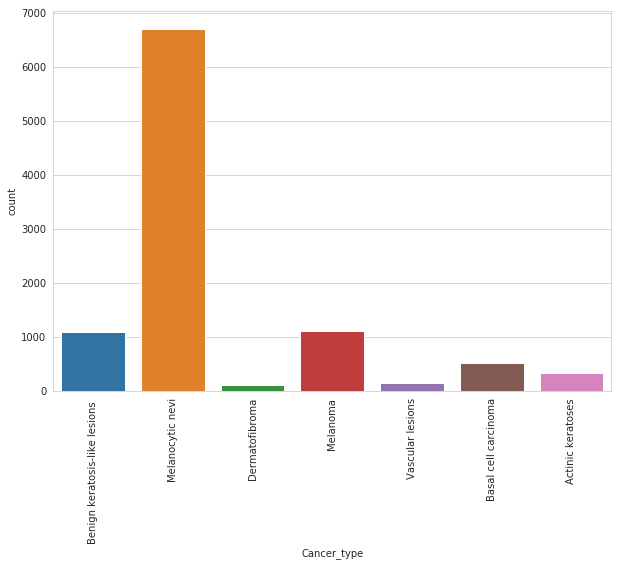

In [150]:
#plotting a count plot of the cancer type
plt.figure(figsize=(10,7))
chart = sns.countplot(df.Cancer_type)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

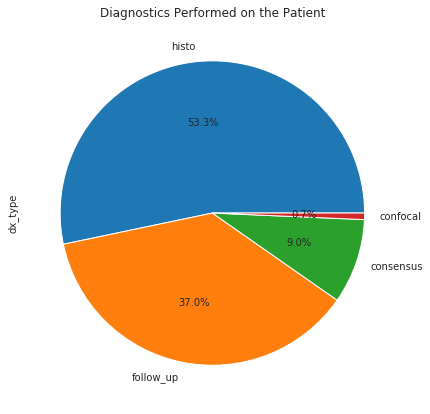

In [149]:
#pie chart to show Diagnostics Performed on the Patient
plt.figure(figsize=(10,7))
df['dx_type'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.title("Diagnostics Performed on the Patient")
plt.show()

<Figure size 1440x720 with 0 Axes>

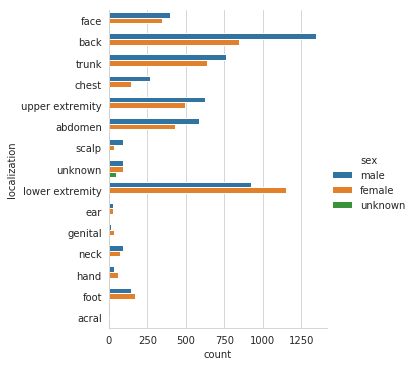

In [148]:
#categorical plot to show body part infected and grouped by sex
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.catplot(y='localization',kind='count',hue='sex',data=df)
plt.show()

In [165]:
#creating a new column agerange 
bins=[0,11,21,31,41,51,61,71,81,91]
labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90']
df['agerange'] = pd.cut(df.age,bins, labels = labels,include_lowest = True)

In [166]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,Cancer_type,Cancer_id,agerange
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face,Benign keratosis-like lesions,2,51-60
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,Benign keratosis-like lesions,2,61-70
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back,Benign keratosis-like lesions,2,61-70
10,HAM_0001396,ISIC_0025276,bkl,histo,55.0,female,trunk,Benign keratosis-like lesions,2,51-60
11,HAM_0004234,ISIC_0029396,bkl,histo,85.0,female,chest,Benign keratosis-like lesions,2,81-90


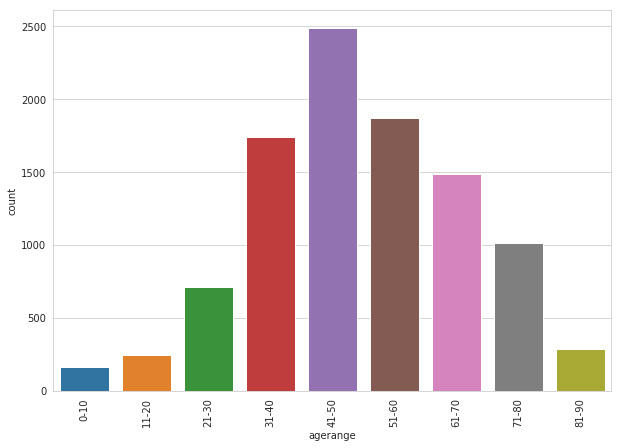

In [167]:
#plotting bar plot to show age range mostly affected
plt.figure(figsize=(10,7))
chart = sns.countplot(df.agerange)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()